## Observable Trends

In [ ]:
1) The temperature decreases as latitude increases or decreases from around 0-20 degrees latitude. The further 
away the equator, the colder it is.
2) The most humid part of the world is north of the equator which is 20-40 degrees.
3) The highest cloudiness is 40-80 degrees north of the equator. The highest concentration is in the far northern 
latitude cities with cloudiness about 50%. There is no correlation with the latitude with cloudiness between 5% 
and 50%.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openweathermapy.core as owm
from citipy import citipy
import requests
import seaborn as sns
from datetime import datetime

from api_keys import api_key

## Generate Cities List

In [2]:
lat_lng = []
cities = []

lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lat, lng)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(set(cities))

624

In [3]:
# I chose 600 because many cities will not have data available
# n=600 seemed safe in order to get above the 500 city threshold
n = 600
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]


## Perform API Cells

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query = f"{url}appid={api_key}&units={units}&q="

In [5]:
cloudiness = []
dates = []
humidity = []
latitude = []
longitude = []
temperature = []
wind_speed = []


for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        cloudiness.append(0)
          
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

weather_df = pd.DataFrame({"City": cities,
                           "Cloudiness": cloudiness,
                           "Country": country_codes,
                           "Date": dates,
                           "Humidity": humidity,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Max Temp": temperature,
                           "Wind Speed": wind_speed,
                          })

Processing record 1 | shache
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=shache,CN
Processing record 2 | teguldet
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=teguldet,RU
City not found. Skipping...
Processing record 3 | cam pha
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=cam pha,VN
Processing record 4 | tigil
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=tigil,RU
Processing record 5 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=butaritari,KI
Processing record 6 | gushikawa
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=gushikawa,JP
Processing record 7 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8

Processing record 55 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=la ronge,CA
Processing record 56 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=santiago del estero,AR
Processing record 57 | castro
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=castro,CL
Processing record 58 | the valley
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=the valley,AI
City not found. Skipping...
Processing record 59 | saleaula
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=saleaula,WS
Processing record 60 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=norman wells,CA
Processing record 61 | nikolskoye
http://api.openweathermap.

Processing record 110 | domna
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=domna,RU
Processing record 111 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=severo-kurilsk,RU
City not found. Skipping...
Processing record 112 | airai
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=airai,PW
Processing record 113 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=husavik,IS
Processing record 114 | sistranda
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=sistranda,NO
City not found. Skipping...
Processing record 115 | mahon
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=mahon,ES
Processing record 116 | new norfolk
http://api.openweathermap.

Processing record 165 | muroto
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=muroto,JP
Processing record 166 | nabire
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=nabire,ID
Processing record 167 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=thompson,CA
City not found. Skipping...
Processing record 168 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=karaul,RU
Processing record 169 | tysmenytsya
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=tysmenytsya,UA
City not found. Skipping...
Processing record 170 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=codrington,AG
Processing record 171 | awbari
http://api.openweathermap.o

Processing record 220 | ilo
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=ilo,PE
Processing record 221 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=hasaki,JP
Processing record 222 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=rio grande,BR
Processing record 223 | moa
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=moa,CU
Processing record 224 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=viedma,AR
Processing record 225 | la malbaie
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=la malbaie,CA
Processing record 226 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperi

Processing record 273 | tshane
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=tshane,BW
Processing record 274 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=moose factory,CA
Processing record 275 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=grindavik,IS
Processing record 276 | sambava
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=sambava,MG
Processing record 277 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=arraial do cabo,BR
Processing record 278 | conde
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=conde,BR
Processing record 279 | sumbawanga
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be9

Processing record 328 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=victoria,SC
Processing record 329 | strazske
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=strazske,SK
Processing record 330 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=tasiilaq,GL
Processing record 331 | bud
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=bud,NO
Processing record 332 | yenagoa
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=yenagoa,NG
Processing record 333 | zwedru
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=zwedru,LR
Processing record 334 | fukue
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperi

Processing record 383 | harnosand
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=harnosand,SE
Processing record 384 | damghan
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=damghan,IR
Processing record 385 | cortes
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=cortes,PH
Processing record 386 | miles city
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=miles city,US
Processing record 387 | pangody
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=pangody,RU
Processing record 388 | laramie
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=laramie,US
Processing record 389 | tokur
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&

Processing record 437 | gorom-gorom
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=gorom-gorom,BF
Processing record 438 | manta
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=manta,EC
Processing record 439 | vondrozo
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=vondrozo,MG
Processing record 440 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=hervey bay,AU
Processing record 441 | taksimo
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=taksimo,RU
Processing record 442 | colac
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=colac,AU
Processing record 443 | acapulco
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe

Processing record 493 | pitkyaranta
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=pitkyaranta,RU
Processing record 494 | peniche
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=peniche,PT
Processing record 495 | crawfordsville
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=crawfordsville,US
Processing record 496 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=thinadhoo,MV
Processing record 497 | aneho
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=aneho,TG
Processing record 498 | hualmay
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=hualmay,PE
Processing record 499 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=8a94

Processing record 548 | vrangel
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=vrangel,RU
Processing record 549 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=coahuayana,MX
Processing record 550 | wahiawa
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=wahiawa,US
Processing record 551 | caravelas
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=caravelas,BR
Processing record 552 | delta del tigre
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=delta del tigre,UY
Processing record 553 | emirdag
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be2e97ea8dbcd2b4fe40&units=imperial&q=emirdag,TR
Processing record 554 | harper
http://api.openweathermap.org/data/2.5/weather?appid=8a943d0be901be

## Latitude vs. Temperature Plot

In [6]:
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 525 unique cities.


In [7]:
weather_df.count()

City          525
Cloudiness    525
Country       525
Date          525
Humidity      525
Latitude      525
Longitude     525
Max Temp      525
Wind Speed    525
dtype: int64

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,shache,64,CN,1.532463e+09,32.0,38.42,77.24,80.93,9.73
1,teguldet,0,RU,1.532463e+09,70.0,57.31,88.17,52.22,5.59
3,tigil,20,RU,1.532463e+09,54.0,57.80,158.67,70.49,4.59
4,butaritari,48,KI,1.532463e+09,100.0,3.07,172.79,81.02,7.05
5,gushikawa,1,JP,1.532462e+09,94.0,26.35,127.87,82.40,3.36


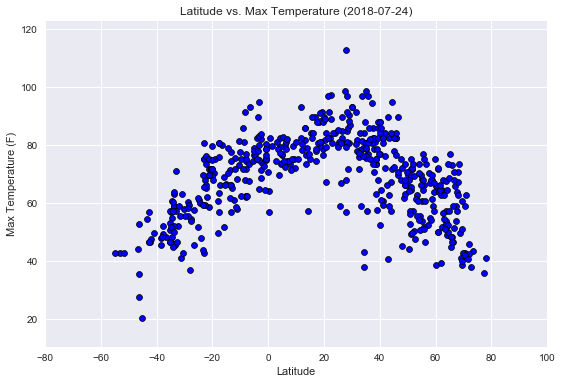

In [9]:
sns.set()

plt.figure(figsize=(9,6))

plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)

plt.show()

## Latitude vs. Humidity Plot

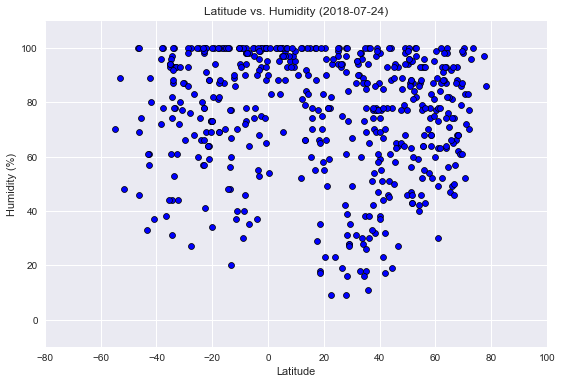

In [10]:
sns.set()

plt.figure(figsize=(9,6))

plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-80,100)
plt.ylim(-10, 110)

plt.show()

## Latitude vs. Cloudiness Plot

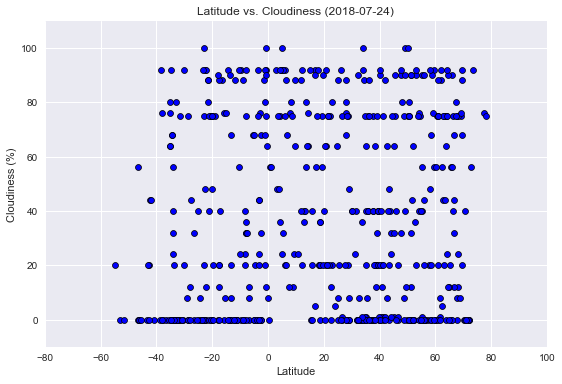

In [11]:
sns.set()

plt.figure(figsize=(9,6))

plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-80,100)
plt.ylim(-10, 110)

plt.show()

## Latitude vs. Wind Speed Plot

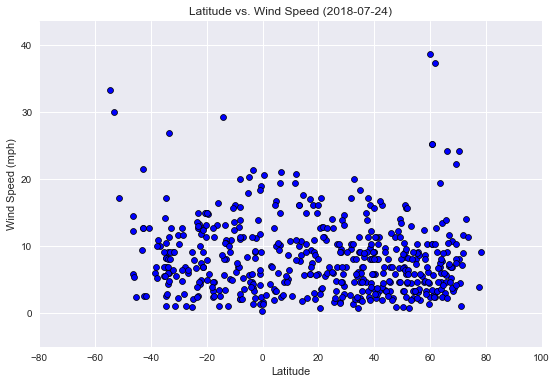

In [12]:
sns.set()

plt.figure(figsize=(9,6))

plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)

plt.show()